# CMPE 260 Reinforcement Learning

## **Project: Live Trading Bot**

**Project Summary:**

Trading has become an important sector for investors to invest in. 

In order to earn profit from stocks or cryptocurrency,  the investor has to make sure to dedicate enough time by checking the market rates for these stocks. investors cannot dedicate 24 hours to monitoring the market. This reduces their chances of doing a profitable transaction at any given point of time. 

Various aspects that restraining the efficacy of humans in trading in several ways. 

1.   The reaction time of the investors. 
2.   Price fluctuation


**Team Members:**

Akanksha Rawat

Karishma Kuria

Nisha Mohan Devadiga


**Project Details:-**



### Install necessary libararies

In [16]:
!pip install stable_baselines3 wandb mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 170 kB 12.9 MB/s 
     |████████████████████████████████| 1.9 MB 73.0 MB/s 
     |████████████████████████████████| 71 kB 11.6 MB/s 
     |████████████████████████████████| 1.5 MB 60.0 MB/s 
     |████████████████████████████████| 182 kB 89.8 MB/s 
     |████████████████████████████████| 168 kB 71.7 MB/s 
     |████████████████████████████████| 63 kB 766 kB/s 
     |████████████████████████████████| 166 kB 77.5 MB/s 
     |████████████████████████████████| 166 kB 71.2 MB/s 
     |████████████████████████████████| 162 kB 62.1 MB/s 
     |████████████████████████████████| 162 kB 101.0 MB/s 
     |████████████████████████████████| 158 kB 98.0 MB/s 
     |████████████████████████████████| 157 kB 96.2 MB/s 
     |████████████████████████████████| 157 kB 95.7 MB/s 
     |████████████████████████████████| 157 kB 78.6 MB/s 
     |███████████████████████████

## Import necessary libraries

In [2]:
import pandas as pd
import glob

##Cloning the github repository - Reinforcement-learning-Live-Trading for DEMO.

In [24]:
!git clone https://github.com/NishaMDev/Reinforcement-learning-Live-Trading.git

Cloning into 'Reinforcement-learning-Live-Trading'...
remote: Enumerating objects: 496, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (98/98), done.
^C


## Read Stock data for AAPL and merge them into one dataset.

Change the directory

In [3]:
cd /content/Reinforcement-learning-Live-Trading

/content/Reinforcement-learning-Live-Trading


Merge all the stock data for AAPL into final csv file for learning.

In [4]:
df = pd.concat([pd.read_csv(f, sep=',') for f in glob.glob('data' + "/AAPL_2*.csv")],
                      ignore_index=True)

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,11/18/2019,66.45,66.86,66.06,66.78,"86,803,600"
1,11/15/2019,65.92,66.45,65.75,66.44,"100,374,680"
2,11/14/2019,65.94,66.22,65.53,65.66,"89,582,244"
3,11/13/2019,65.28,66.20,65.27,66.12,"103,270,360"
4,11/12/2019,65.39,65.70,65.23,65.49,"87,388,920"


In [7]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

Convert data field as datetime.

In [8]:
df['Date'] = pd.to_datetime(df ['Date'])

In [9]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-11-18,66.45,66.86,66.06,66.78,"86,803,600"
1,2019-11-15,65.92,66.45,65.75,66.44,"100,374,680"
2,2019-11-14,65.94,66.22,65.53,65.66,"89,582,244"
3,2019-11-13,65.28,66.20,65.27,66.12,"103,270,360"
4,2019-11-12,65.39,65.70,65.23,65.49,"87,388,920"


We need to convert the values from string to float type. Otherwise, it won't work.

In [11]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-11-18,66.45,66.86,66.06,66.78,86803600.0
1,2019-11-15,65.92,66.45,65.75,66.44,100374680.0
2,2019-11-14,65.94,66.22,65.53,65.66,89582244.0
3,2019-11-13,65.28,66.20,65.27,66.12,103270360.0
4,2019-11-12,65.39,65.70,65.23,65.49,87388920.0


In [13]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [14]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Volume
250,2018-11-19,47.50,47.68,46.25,46.47,167683484.0
249,2018-11-20,44.59,45.37,43.88,44.25,271301000.0
248,2018-11-21,44.93,45.07,44.14,44.20,124496844.0
247,2018-11-23,43.74,44.15,43.03,43.07,94495884.0
246,2018-11-26,43.56,43.74,42.57,43.66,179994080.0
...,...,...,...,...,...,...
759,2022-11-09,138.50,138.55,134.59,134.87,74917789.0
758,2022-11-10,141.24,146.87,139.50,146.87,118854000.0
757,2022-11-11,145.82,150.01,144.37,149.70,93979672.0
756,2022-11-14,148.97,150.28,147.43,148.28,73374109.0


In [ ]:
df.to_csv('data/AAPl.csv',index=False)

In [15]:
new_df = pd.read_csv('data/AAPL.csv')
new_df

,Date,Open,High,Low,Close,Volume
0,2018-11-19,47.50,47.68,46.25,46.47,167683484.0
1,2018-11-20,44.59,45.37,43.88,44.25,271301000.0
2,2018-11-21,44.93,45.07,44.14,44.20,124496844.0
3,2018-11-23,43.74,44.15,43.03,43.07,94495884.0
4,2018-11-26,43.56,43.74,42.57,43.66,179994080.0
...,...,...,...,...,...,...
995,2022-10-28,148.20,157.50,147.82,155.74,164762406.0
996,2022-10-31,153.16,154.24,151.92,153.34,97943172.0
997,2022-11-01,155.08,155.45,149.13,150.65,80379352.0
998,2022-11-02,148.95,152.17,145.00,145.03,93604625.0


## Trading Inferences by running different algorithms - 

The following battles will be performed between different players. 
For each of these games the different Computer Players will be configured with default hyper parameters


PPO ALgorithm

In [17]:
pwd

'/content/Reinforcement-learning-Live-Trading'

In [18]:
from stocktrade import Stocktrade

eval/mean_ep_length,▁▁▁▁
eval/mean_reward,▁▁▁▁
global_step,▁▃▃▆██
time/fps,▁█
train/approx_kl,▁
train/clip_fraction,▁
train/clip_range,▁
train/entropy_loss,▁
train/explained_variance,▁
train/learning_rate,▁
train/loss,▁


/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float16
  "Box bound precision lowered by casting to {}".format(self.dtype)
wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cuda device
Logging to runs/2dg7ocza/PPO_1


/content/Reinforcement-learning-Live-Trading/env/stock_trading_env.py:101: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


Eval num_timesteps=1000, episode_reward=3003000.00 +/- 0.00
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | 3e+06    |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=3003000.00 +/- 0.00
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | 3e+06    |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
-----------------------------
| time/              |      |
|    fps             | 121  |
|    iterations      | 1    |
|    time_elapsed    | 16   |
|    total_timesteps | 2048 |
-----------------------------
Eval num_timesteps=3000, episode_reward=3003000.00 +/- 0.00
Episode length: 1000.00 +/- 0.00
-------------

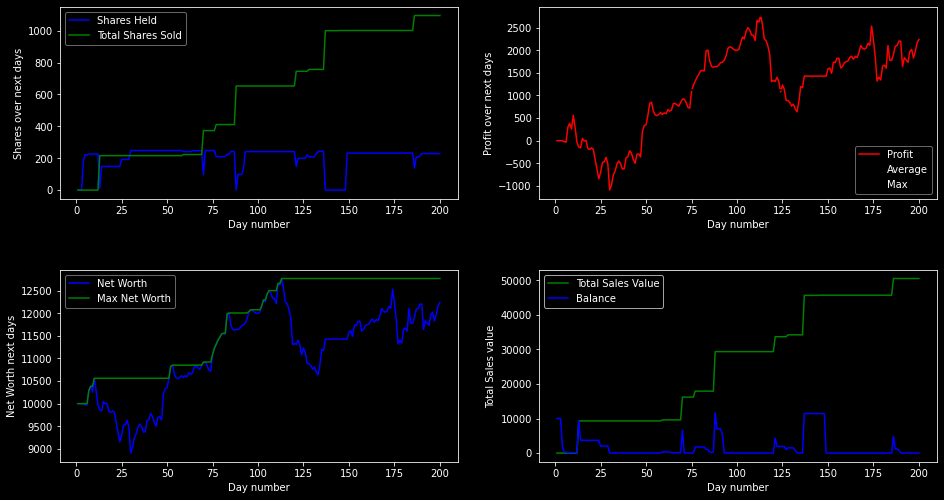

eval/mean_ep_length,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/mean_reward,█████████████████████████████████▅▅▄▃▃▁▁
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
time/fps,█▅▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
train/approx_kl,█▂▃▂▁▃▄▂▃▁▇▄▂▃▂▂▂▂▁▅▄▂▁▃▂▁▅▂▂▄▂▂▁▃▅▁▁▄▂▄
train/clip_fraction,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/clip_range,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/entropy_loss,████▇▇▇▇▇▇▆▆▆▆▆▅▅▄▄▄▃▃▃▄▄▃▃▃▂▂▂▁▁▁▁▂▂▁▁▁
train/explained_variance,▁█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,▂▁▂▃▅▂▄▂▂▂▃▃█▃▃▄▂▇▄▃▁▄▄▁▂▅▂▃▄▃▃▅▄▄▆▄▂▃▃▂


In [20]:
#### 6.1 Running PPO algorithm over 10000 time steps
if __name__ == "__main__":
    timesteps = 100000
    algo = "PPO"
    Stocktrade.stocktrade(algo,timesteps)

A2C Algorithm

wandb: Currently logged in as: nishamdev. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float16
  "Box bound precision lowered by casting to {}".format(self.dtype)
wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Using cuda device
Logging to runs/1ccd8x02/A2C_1


/content/Reinforcement-learning-Live-Trading/env/stock_trading_env.py:101: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


mean_reward:3003000.00 +/- 0.00


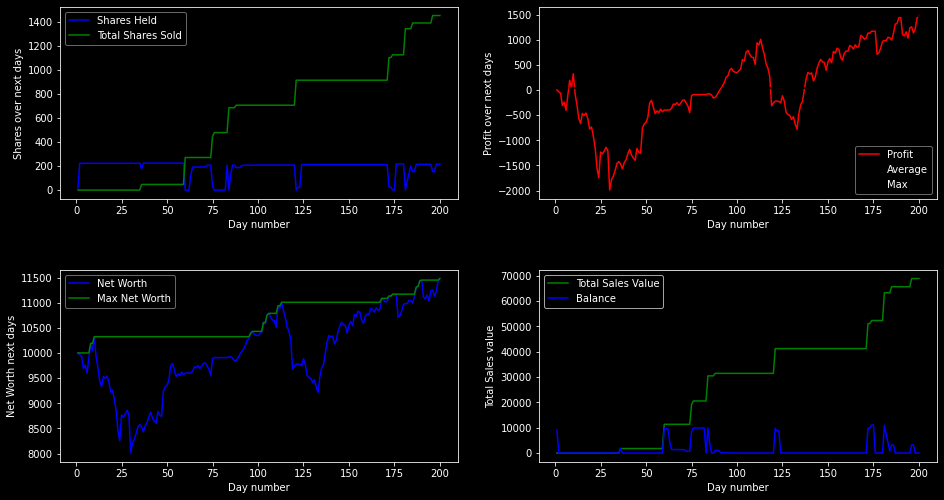

In [21]:
#### 6.2  Running A2C algorithm over 100 time steps
if __name__ == "__main__":
    timesteps = 100
    algo = "A2C"
    Stocktrade.stocktrade(algo,timesteps)

SAC Algorithm

/usr/local/lib/python3.7/dist-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float16
  "Box bound precision lowered by casting to {}".format(self.dtype)


Using cuda device


wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Logging to runs/zskbdnno/SAC_1


/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


mean_reward:3003000.00 +/- 0.00


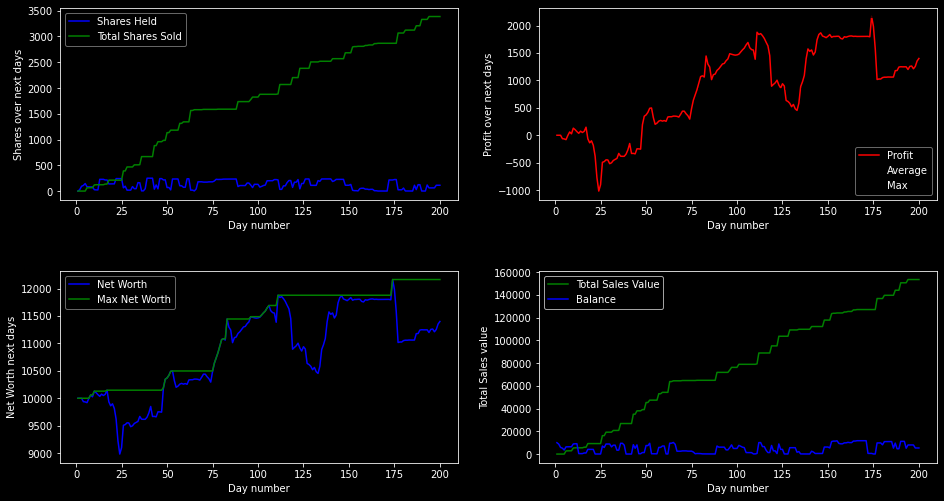

In [23]:
#### 6.3 Running SAC algorithm over 100 time steps
if __name__ == "__main__":
    timesteps = 100
    algo = "SAC"
    Stocktrade.stocktrade(algo,timesteps)